In [81]:
using CSV,DataFrames,XLSX,Statistics
using LinearAlgebra,SparseArrays
using JLD2
using PyCall
using PyPlot
import Seaborn


In [54]:
PyPlot.svg(true)
tkr=pyimport("matplotlib.ticker")

fm=pyimport("matplotlib.font_manager")
font_prop = fm.FontProperties(fname="/Users/mickael/Library/Fonts/Harding Text Web Regular Regular.ttf",size=10, weight="bold");
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 8

font_prop_ticks = fm.FontProperties(fname="/Users/mickael/Library/Fonts/Harding Text Web Regular Regular.ttf",size=8);
font_prop_titles = fm.FontProperties(fname="/Users/mickael/Library/Fonts/Harding Text Web Regular Regular.ttf",size=11, weight="bold");
font_prop_labels = fm.FontProperties(fname="/Users/mickael/Library/Fonts/Harding Text Web Regular Regular.ttf",size=10);
font_prop_legend = fm.FontProperties(fname="/Users/mickael/Library/Fonts/Harding Text Web Regular Regular.ttf",size=6);


In [55]:
respath="../Results/"


"../Results/"

# Global Safe operating Space

In [56]:
PBx=[1, 350, 2.752, 0.14, 4000, 26.2, 62, 275, 75, 90] # planetary boudaries
Pre_industrial=[0, 278, 3.44, 0.25, 0, 20, 0, 290, 100, 100] #Pre-industrial values
PBunits = ["W/m2","ppm","Ωarag","Aerosol optical depth","km3","TgP","TgN","Dobson units","%","%"]; #units
SOS=abs.(PBx-Pre_industrial);
control_var=    ["Climate change-Energy imbalance"
                    "Climate change-CO2 Concentration"
                    "Ocean acidification-Carbonate ion concentration"
                    "Atmospheric aerosol loading-Aerosol Optical Depth (AOD)"
                    "Freshwater use-Global"
                    "Biogeochemical flows-P"
                    "Biogeochemical flows-N"
                    "Stratospheric ozone depletion-Stratospheric O3 concentration"
                    "Land-system change-Global"
                    "Biosphere Integrity-Change in biosphere integrity"];

df=DataFrame(hcat(control_var,PBx,Pre_industrial,SOS,PBunits),:auto)
rename!(df, Dict(:x1 =>"Control variable", :x2 => "Planetary boundary",:x3 => "Pre-industrial value", :x4 => "SOS", :x5 => "Units"))


Row,Control variable,Planetary boundary,Pre-industrial value,SOS,Units
,Any,Any,Any,Any,Any
1,Climate change-Energy imbalance,1.0,0.0,1.0,W/m2
2,Climate change-CO2 Concentration,350.0,278.0,72.0,ppm
3,Ocean acidification-Carbonate ion concentration,2.752,3.44,0.688,Ωarag
4,Atmospheric aerosol loading-Aerosol Optical Depth (AOD),0.14,0.25,0.11,Aerosol optical depth
5,Freshwater use-Global,4000.0,0.0,4000.0,km3
6,Biogeochemical flows-P,26.2,20.0,6.2,TgP
7,Biogeochemical flows-N,62.0,0.0,62.0,TgN
8,Stratospheric ozone depletion-Stratospheric O3 concentration,275.0,290.0,15.0,Dobson units
9,Land-system change-Global,75.0,100.0,25.0,%


# Allocation factor


In [60]:
@load respath*"AR6/SAP.jld" SAP_exp
full_mat=SAP_exp # safe operating space allocation factor per kgH2


20×6 Matrix{Float64}:
 9.64562e-14  7.17397e-14  5.01926e-14  3.71317e-14  3.76581e-14  4.13131e-14
 8.97035e-14  7.75163e-14  5.30167e-14  4.3123e-14   4.61334e-14  5.69607e-14
 7.20952e-14  7.05479e-14  7.45242e-14  8.82751e-14  1.17305e-13  1.32187e-13
 9.63909e-14  8.50085e-14  5.1009e-14   3.95633e-14  3.98534e-14  3.67576e-14
 9.04816e-14  8.80927e-14  9.21146e-14  8.93458e-14  5.96301e-14  4.42072e-14
 9.63508e-14  7.56869e-14  4.69806e-14  2.94757e-14  2.30078e-14  2.0511e-14
 9.42729e-14  8.44717e-14  5.26036e-14  4.74446e-14  6.16658e-14  7.45488e-14
 7.81426e-14  5.70909e-14  4.09454e-14  3.39142e-14  3.04547e-14  2.95696e-14
 7.74311e-14  5.46888e-14  3.70752e-14  3.05698e-14  2.72444e-14  2.60416e-14
 9.0055e-14   8.72523e-14  8.2762e-14   7.12724e-14  4.54918e-14  3.21015e-14
 9.18466e-14  8.8672e-14   8.08787e-14  6.63079e-14  4.51379e-14  3.70544e-14
 7.10944e-14  5.66602e-14  4.41369e-14  3.72357e-14  3.65854e-14  3.92202e-14
 8.7235e-14   7.29165e-14  5.07009e-14  3.5

In [ ]:
median_vals = mapslices(x -> median(x), full_mat; dims=1)|>vec
q1_5 = mapslices(x -> quantile(x, 0.05), full_mat; dims=1)|>vec
q3_95 = mapslices(x -> quantile(x, 0.95), full_mat; dims=1)|>vec

AP_lower=ones(3,6).*q1_5'
AP_med =ones(3,6).*median_vals'
AP_upper =ones(3,6).*q3_95';


### ***3.1.3 allocated safe operating space***
Now we introduce the planetary boundary interaction matrix. In this matrix, rows and columns are ordered in the same way as above. It represents the effects of rows on columns. Since Lade et al(2020) defined only one boundary for climate change. We simply duplicated the climate change column to respect the dimensions in this work. We did the same process for Biochemical flows.


In [62]:
asos_lower=[SOS*ap for ap in AP_lower]'
asos_med=[SOS*ap for ap in AP_med]'
asos_upper=[SOS*ap for ap in AP_upper]';


# Critical analysis

In [70]:
scenario_path="/Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Code and data/lca/src/Scenario/"


"/Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Code and data/lca/src/Scenario/"

In [71]:
SSP1 = CSV.read(scenario_path*"SSP1-remind.csv", DataFrame)
SSP2 = CSV.read(scenario_path*"SSP2-remind.csv", DataFrame)
SSP5 = CSV.read(scenario_path*"SSP5-remind.csv", DataFrame)
SSP=vcat(SSP1, SSP2, SSP5);
years = parse.(Int, names(SSP)[findfirst(==("2020"), names(SSP)):findfirst(==("2100"), names(SSP))]);


In [72]:
function get_vals(Variable::String;Region::String="World",
    SSP=SSP,start_year::String="2020",end_year::String="2100",show::Bool=false)
    
    SSPa=filter(row -> row[:Variable] == Variable && row[:Region] == Region, SSP)
    global Scenario=reshape(SSPa[:,"Scenario"], 1, :)
    global Scenario[2]="SSP2-PkBudg500"
    global Unit=SSPa[1,"Unit"]
    start_idx = findfirst(==(start_year), names(SSPa))
    end_idx = findfirst(==(end_year), names(SSP))
    SSPb=SSPa[:, start_idx:end_idx]

    if show
        p=Plots.plot(years[2:7],Matrix(SSPb[1:3,2:7])',
            labels=reshape(Scenario, 1, :),
            ylabel=Unit,mark=(:circle, 5, 0.5))
        display(p)
    end
    return SSPb[1:3,2:7]
end


get_vals (generic function with 1 method)

In [73]:
𝛈_electrolysis_raw=get_vals("Tech|Hydrogen|Electricity|Efficiency")
𝛈_electrolysis=Matrix(𝛈_electrolysis_raw./𝛈_electrolysis_raw[:,1])';

SEH2=get_vals("SE|Hydrogen",show=false);
EJ_kWh= 1/3.6e-12 #kWh/EJ
LHVH2=33.33 # kWh/kgH2
EJH2_to_kgH2=EJ_kWh/LHVH2 # kWh/EJ * kgH2/kWh = kgH2/EJ

SEH2=get_vals("SE|Hydrogen") #EJ
TotalkgH2=SEH2.*EJH2_to_kgH2 # EJ * kgH2/EJ = kgH2

TotalMtH2=TotalkgH2.*1e-9 # mass H2 to MtH2
TotalGtH2=TotalkgH2.*1e-12 # mass H2 to GtH2
;


In [96]:
median_vals = mapslices(x -> median(x), full_mat; dims=1)|>vec
min_vals = mapslices(x -> minimum(x), full_mat; dims=1)|>vec
max_vals = mapslices(x -> maximum(x), full_mat; dims=1)|>vec
q1_5 = mapslices(x -> quantile(x, 0.05), full_mat; dims=1)|>vec
q3_95 = mapslices(x -> quantile(x, 0.95), full_mat; dims=1)|>vec
q1_25 = mapslices(x -> quantile(x, 0.25), full_mat; dims=1)|>vec
q3_75 = mapslices(x -> quantile(x, 0.75), full_mat; dims=1)|>vec;


In [89]:
α¹ =Matrix((get_vals("Emi|CO2|Gross|Energy|Supply|+|Hydrogen")./get_vals("Emi|CO2|Gross"))./TotalkgH2)'
share=get_vals("SE|Hydrogen")./get_vals("SE")
α² =Matrix(((get_vals("Emi|CO2|Gross|Energy|+|Supply")./get_vals("Emi|CO2|Gross")).*share)./TotalkgH2)';


In [84]:
MWh_H2=get_vals("SE|Hydrogen").*(1/3.6e-9) #MWh/yr
cf=0.6 # assumed capacity factor
((MWh_H2./(8760*cf))./1000)
;


In [85]:
GW_Cap=((MWh_H2./(8760*cf))./1000)|> Matrix #capacity in GW
;


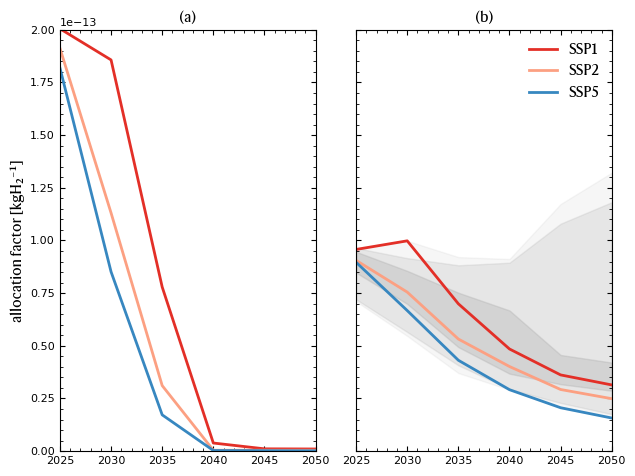

In [101]:
rcParams["ytick.right"] = true
rcParams["xtick.top"] = true
rcParams["xtick.bottom"] = true
rcParams["ytick.direction"] = "in"
rcParams["ytick.minor.visible"] = true
rcParams["xtick.direction"] = "in"
rcParams["xtick.minor.visible"] = true
rcParams["figure.facecolor"] = "white"
rcParams["axes.prop_cycle"] = plt.cycler("color",["#e32f27"
                                                "#fca082"
                                                "#3787c0"]);

fig, axs = plt.subplots(1,2,sharey=true)#,figsize=(12,7)
axs[1].plot(2025:5:2050,α¹ ,label=["SSP1","SSP2","SSP5"],linewidth=2)
axs[2].plot(2025:5:2050,α² ,label=["SSP1","SSP2","SSP5"],linewidth=2)


axs[2].fill_between(x=2025:5:2050, y1=q1_5, y2=q3_95, color="darkgrey", alpha=0.2)##822681
axs[2].fill_between(x=2025:5:2050, y1=q1_25, y2=q3_75, color="darkgrey", alpha=0.3)
axs[2].fill_between(x=2025:5:2050, y1=min_vals, y2=max_vals, color="darkgrey", alpha=0.1)




axs[1].set_ylim(0, 2e-13)
axs[2].set_ylim(0, 2e-13)
axs[1].set_xlim(2025, 2050)
axs[2].set_xlim(2025, 2050)
axs[1].set_ylabel("allocation factor [kgH₂⁻¹]",fontproperties=font_prop_labels)
# ax.figure.set_facecolor("white")

axs[1].set_title("(a)",fontproperties=font_prop_labels)
axs[2].set_title("(b)",fontproperties=font_prop_labels)


plt.tight_layout()
plt.legend(frameon=false,prop=font_prop_labels)
plt.savefig(respath*"ap_false.svg",transparent=true)
display(plt.gcf())
plt.close("all")

rcParams["ytick.right"] = false
rcParams["xtick.top"] = false
rcParams["xtick.bottom"] = true
rcParams["ytick.direction"] = "out"
rcParams["ytick.minor.visible"] = false
rcParams["xtick.direction"] = "out"
rcParams["xtick.minor.visible"] = false
rcParams["figure.facecolor"] = "white";
